In this notebook we look at Jack's data.

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy, pandas

/home/alger/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
jack_path = Path(
    '/home/alger/possum/livingston/stokes_data_collection/'
    'galactic_centre/')

In [10]:
test_path = sorted(jack_path.iterdir())[0]

In [27]:
colnames = ['freq', 'I', 'Q', 'U', 'I_RMS', 'Q_RMS', 'U_RMS']
data = pandas.read_table(test_path, sep=' ', names=colnames)
data['lsq'] = (3e8 / data.freq) ** 2

## Basic plots

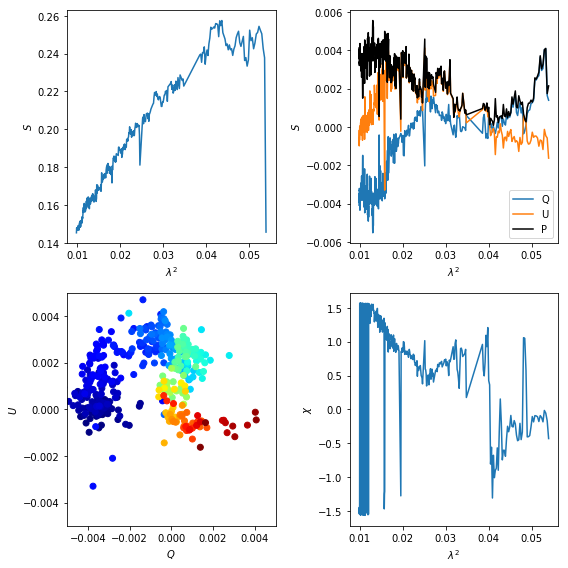

In [42]:
fig, ((a, b), (c, d)) = plt.subplots(2, 2, figsize=(8, 8))
a.plot(data.lsq, data.I)
a.set_xlabel('$\\lambda^2$')
a.set_ylabel('$S$')
b.plot(data.lsq, data.Q, label='Q')
b.plot(data.lsq, data.U, label='U')
b.plot(data.lsq, numpy.sqrt(data.Q ** 2 + data.U ** 2), label='P',
       c='k')
b.set_xlabel('$\\lambda^2$')
b.set_ylabel('$S$')
b.legend()
c.scatter(data.Q, data.U, c=data.lsq, cmap='jet')
c.set_xlabel('$Q$')
c.set_ylabel('$U$')
c.set_xlim(-0.005, 0.005)
c.set_ylim(-0.005, 0.005)
d.plot(data.lsq, numpy.arctan2(data.U, data.Q) / 2)
d.set_xlabel('$\\lambda^2$')
d.set_ylabel('$\\chi$')
plt.tight_layout()